In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
data = pd.read_csv("Raw_Housing_Prices3.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Date House was Sold                        21609 non-null  object 
 3   Sale Price                                 21609 non-null  float64
 4   No of Bedrooms                             21609 non-null  int64  
 5   No of Bathrooms                            21609 non-null  float64
 6   Flat Area (in Sqft)                        21609 non-null  float64
 7   Lot Area (in Sqft)                         21609 non-null  float64
 8   No of Floors                               21609 non-null  float64
 9   Waterfront View                            21609 non-null  object 
 10  No of Times Visited   

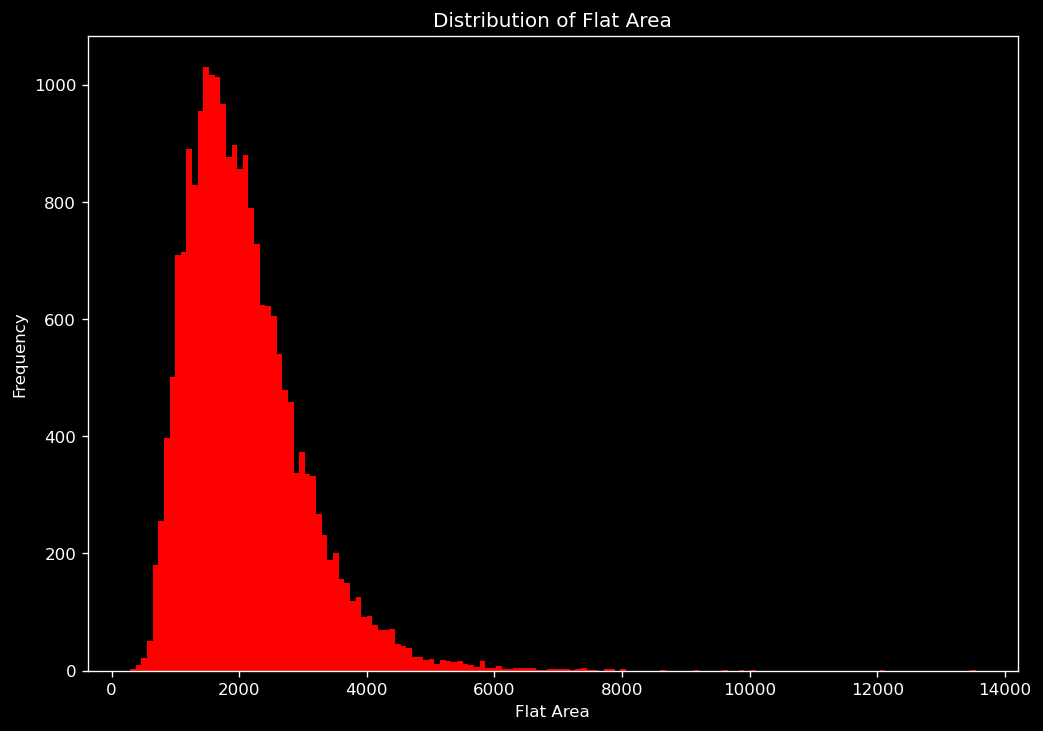

In [5]:
plt.figure(figsize = (10,7), dpi = 120)
plt.hist(data['Flat Area (in Sqft)'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution of Flat Area')
plt.show()

In [6]:
def log_transform(sample_data):
    return np.log(sample_data)

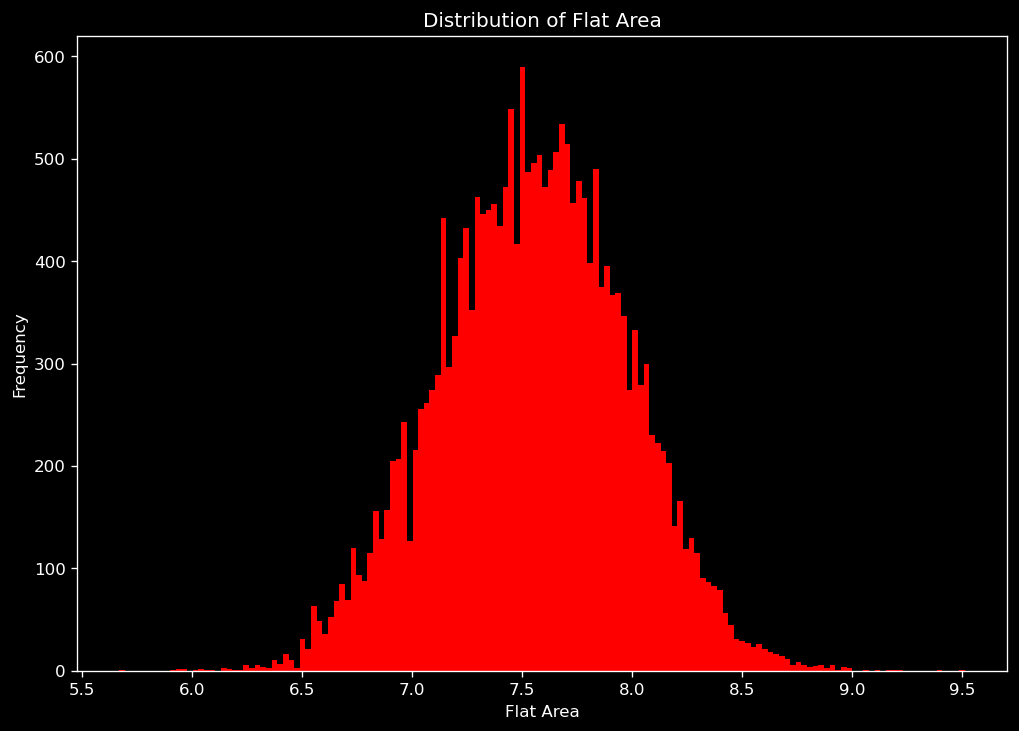

In [7]:
data['Transformed Flat Area'] = data ['Flat Area (in Sqft)'].map(log_transform)

plt.figure(figsize = (10,7), dpi = 120)
plt.hist(data['Transformed Flat Area'], bins =150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution of Flat Area')
plt.show()

In [8]:
# label encoding
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [9]:
label_encoded = label_encoded.map({'Bad': 1,
                                  'Okay': 2,
                                  'Fair': 3,
                                  'Good': 4,
                                  })

In [7]:
mean = []
for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

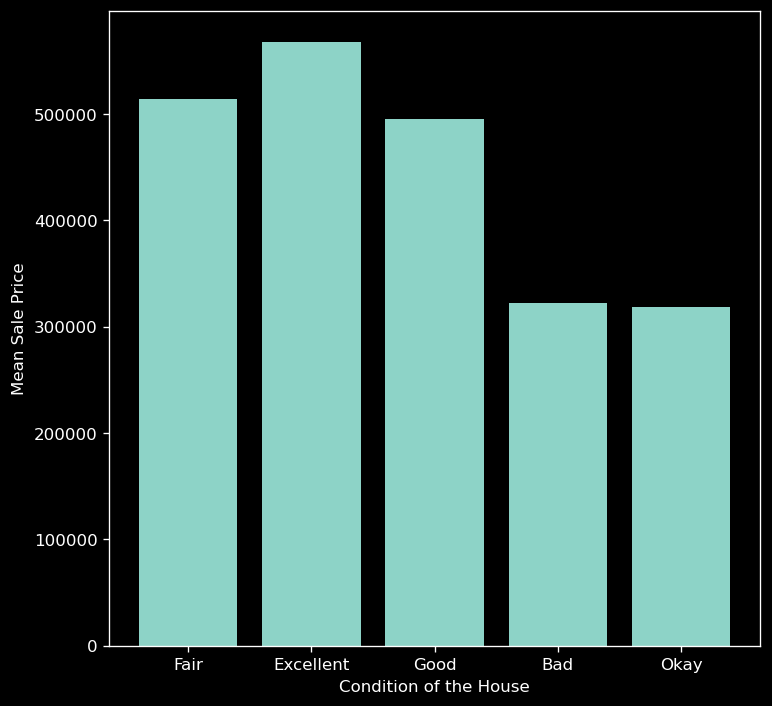

In [8]:
plt.figure(figsize = (7,7), dpi =120)
plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the House')
plt.ylabel('Mean Sale Price')
plt.show()

In [14]:
mapping = {'Excellent': 'Excellent',
           'Fair': 'Good', 'Good': 'Good', 'Bad': 'Okay', 'Okay': 'Okay'}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

In [15]:
mean = []
for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

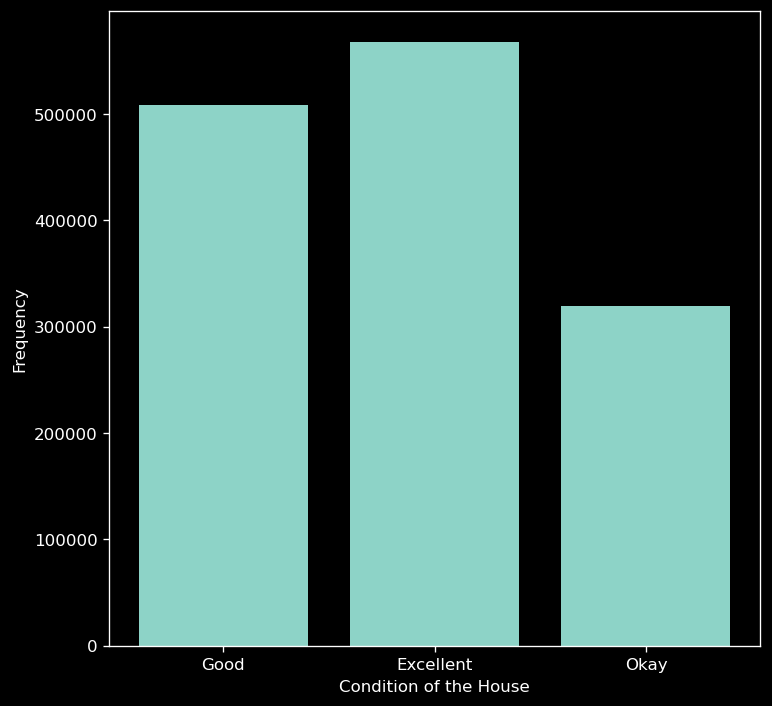

In [17]:
plt.figure(figsize = (7,7), dpi = 120)
plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the House')
plt.ylabel('Frequency')
plt.show()

In [ ]:
len(data['Age of House (in Years)'].unique())

In [ ]:

data['Age of House (in Years)'].max()

In [ ]:

data['Age of House (in Years)'].min()

In [ ]:
def age_of_house(x):
    if x < 10:
        x = 'new'
    elif x < 50:
        x= 'old'
    else:
        x = 'very old'
    return x      

In [ ]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

# Feature Generation


In [47]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year
data['month_sold'] = time.month
data['weekday_sold'] = time.weekday
data['date_sold'] = time.days_in_month
data[['year_sold','month_sold','weekday_sold','date_sold']].head()


,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,5,31
1,2017,12,3,31
2,2016,2,0,29
3,2017,12,3,31
4,2016,2,0,29


In [20]:
# Using apply()
def luxury_home(row):
    count = 0
    if row[0] == 'Yes':
        count=count+1
    if row[1] in ['Good','Excellent']:
        count=count+1
    if row[2] >= 8:
        count=count+1
    if count >= 2:
        return 'Yes'
    else:
        return 'No'
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis =1)

In [21]:
luxury = data.pivot_table(values='Sale Price', columns = 'luxury_home',aggfunc = 'mean')
luxury

luxury_home,No,Yes
Sale Price,380385.64475,655067.166021


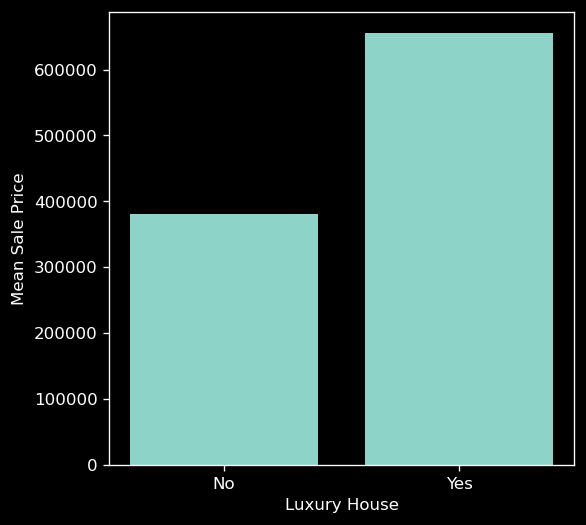

In [22]:
plt.figure(figsize = (5,5),dpi=120)
plt.bar(luxury.columns,luxury.iloc[0])
plt.xlabel('Luxury House')
plt.ylabel('Mean Sale Price')
plt.show()